In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
debussy_file = "/content/drive/My Drive/Multimedia/debussy.wav"
redhot_file = "/content/drive/My Drive/Multimedia/redhot.wav"
duke_file = "/content/drive/My Drive/Multimedia/duke.wav"

In [ ]:
ipd.Audio(debussy_file)

In [ ]:
ipd.Audio(redhot_file)

# **Frequency domain features**
Time-domain plots show signal variation with respect to time. Therefore, to analyze a signal in terms of frequency, the time-domain signal is converted into frequency-domain signals using transforms such as the Fourier transform or auto-regression analysis. We've already seen this implemented in previous time-domain feature extraction using STFTs.

In [ ]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file)
duke, _ = librosa.load(duke_file)

# **Chroma related features**
Chroma features are a powerful representation of music audio in which we use a 12-element representation of spectral energy called a chroma vector where each of the 12 bins represeent the 12 equal-tempered pitch class of western-type music (semitone spacing). It can be computed from the logarithmic short-time Fourier transform of the input sound signal, also called a chromagram or a pitch class profile.

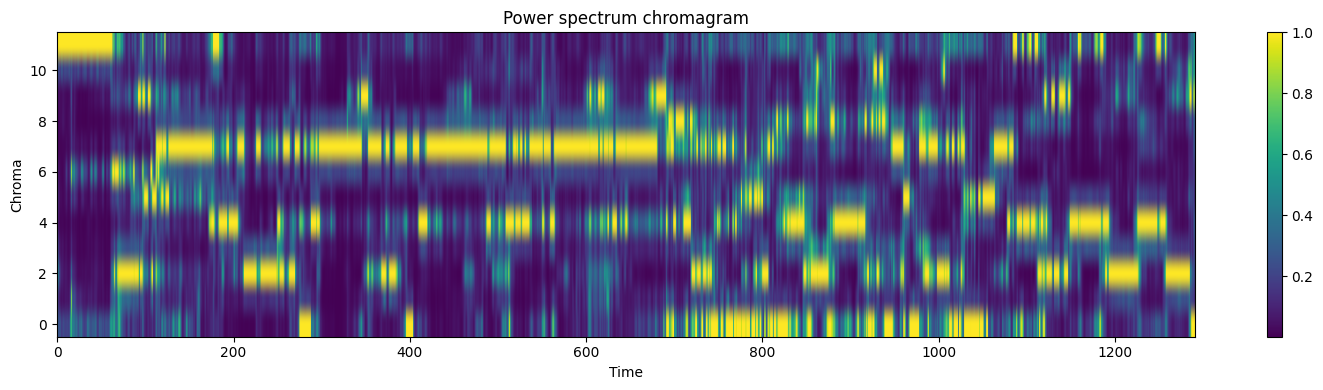

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load(debussy_file)

# Compute the Chromagram
chroma_d = librosa.feature.chroma_stft(y=y, sr=sr)

# Plot the Chromagram
plt.figure(figsize=(15, 4))
plt.imshow(chroma_d, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar()
plt.title('Power spectrum chromagram')
plt.xlabel('Time')
plt.ylabel('Chroma')
plt.tight_layout()
plt.show()

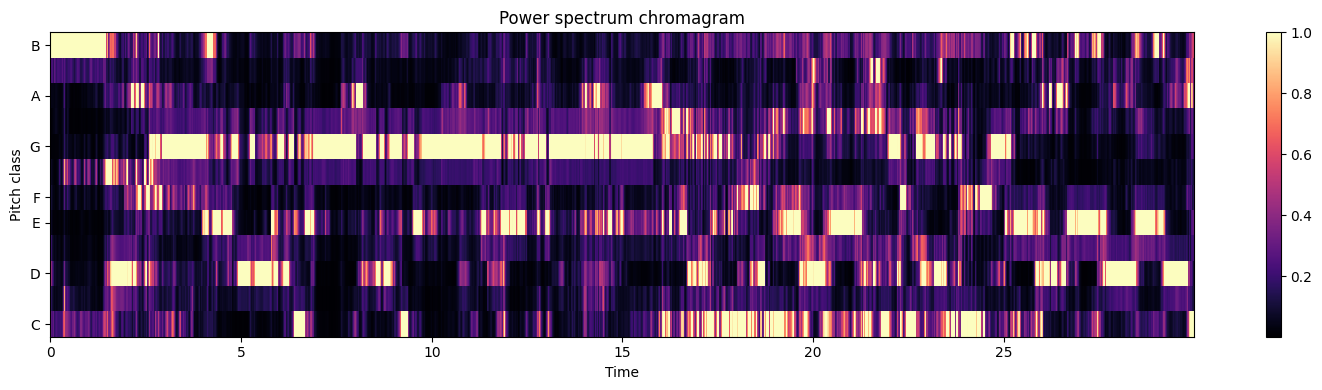

In [ ]:
chroma_d = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma_d, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Power spectrum chromagram')
plt.tight_layout()
plt.show()

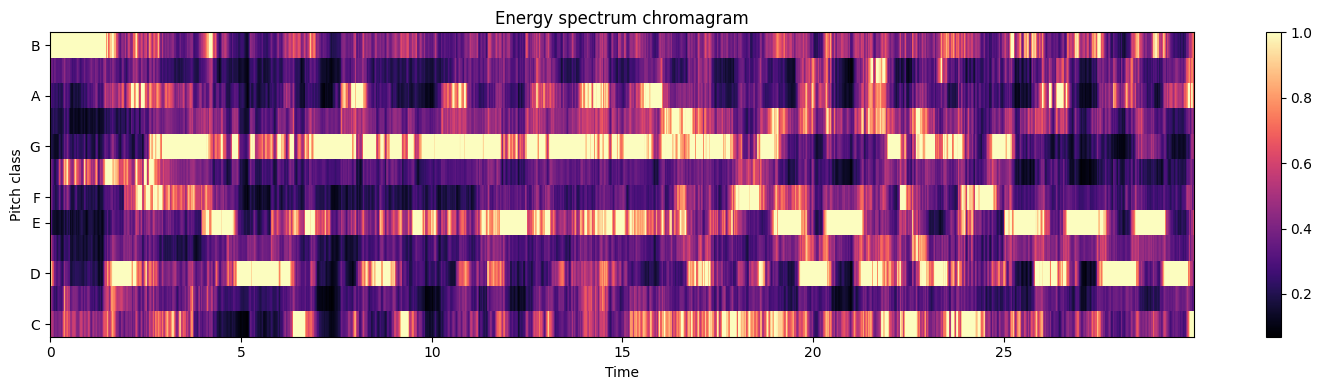

In [ ]:
# using an energy (magnitude) spectrum
S = np.abs(librosa.stft(y)) # apply short-time fourier transform
chroma_e = librosa.feature.chroma_stft(S=S, sr=sr)

plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma_e, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Energy spectrum chromagram')
plt.tight_layout()
plt.show()

# **Tonality-based features**
The tonal sounds of a harmonic stationary audio signal is actually the fundamental frequency (FF). The more technical definition of the FF is that it is the first peak of the local normalized spectrotemporal auto-correlation function (english translation: the lowest frequency of a periodic waveform). FF is an important feature for music onset detection, audio retrieval, and sound type classification.

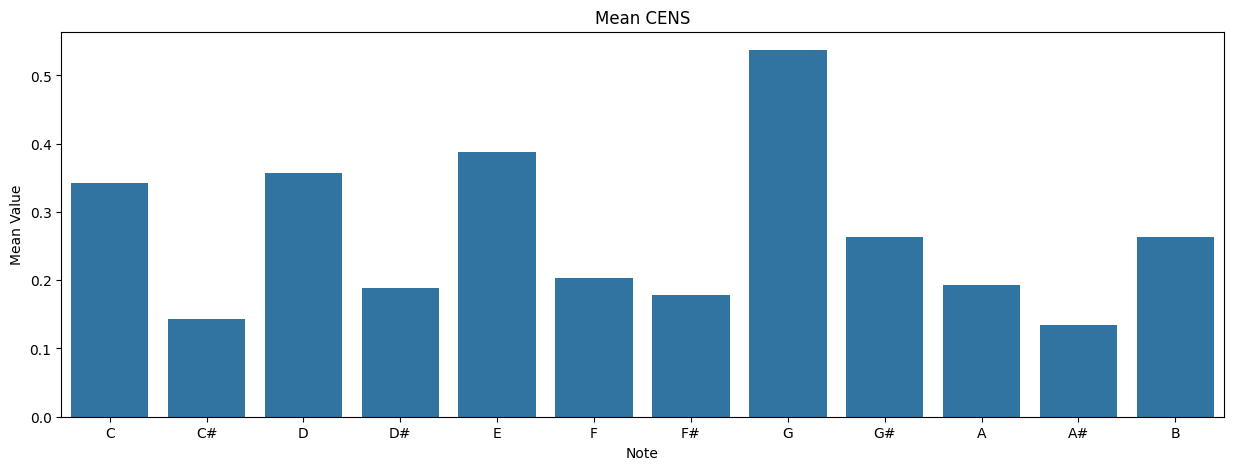

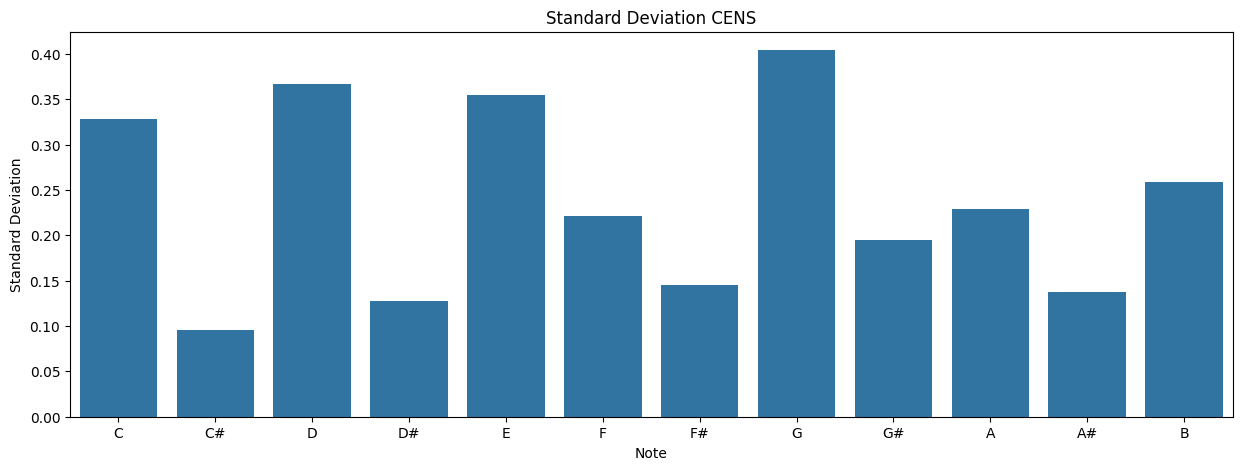

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the audio file
y, sr = librosa.load(debussy_file)

# Compute the Chromagram
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Compute the mean and standard deviation of CENS
chroma_mean = np.mean(chroma, axis=1)
chroma_std = np.std(chroma, axis=1)

# Plot the summary
octave = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

# Plot Mean CENS
plt.figure(figsize=(15, 5))
plt.title('Mean CENS')
sns.barplot(x=octave, y=chroma_mean)
plt.xlabel('Note')
plt.ylabel('Mean Value')
plt.show()

# Plot Standard Deviation CENS
plt.figure(figsize=(15, 5))
plt.title('Standard Deviation CENS')
sns.barplot(x=octave, y=chroma_std)
plt.xlabel('Note')
plt.ylabel('Standard Deviation')
plt.show()


# **Spectrum Shape based features**
# **Spectral centroid** **bold text**
The spectral centroid is a measure to characterize the "center of mass" of a given spectrum. Perceptually, it has a robust connection with the impression of sound "brightness". Timbre researchers formalize brightness as an indication of the amount of high-frequency content in a sound.

The **spectral centroid** is calculated as the weighted means of the frequencies present in a given signal, determined using a Fourier transform, with the frequency magnitudes as the weights.

In [ ]:
FRAME_SIZE = 2048
HOP_LENGTH = 512

sc_debussy = librosa.feature.spectral_centroid(y=debussy, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]  #high energy in the centre
sc_redhot = librosa.feature.spectral_centroid(y=redhot, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
sc_duke = librosa.feature.spectral_centroid(y=duke, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
sc_debussy.shape

(1292,)

In [ ]:
frames = range(len(sc_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

In [ ]:
len(t)

1292

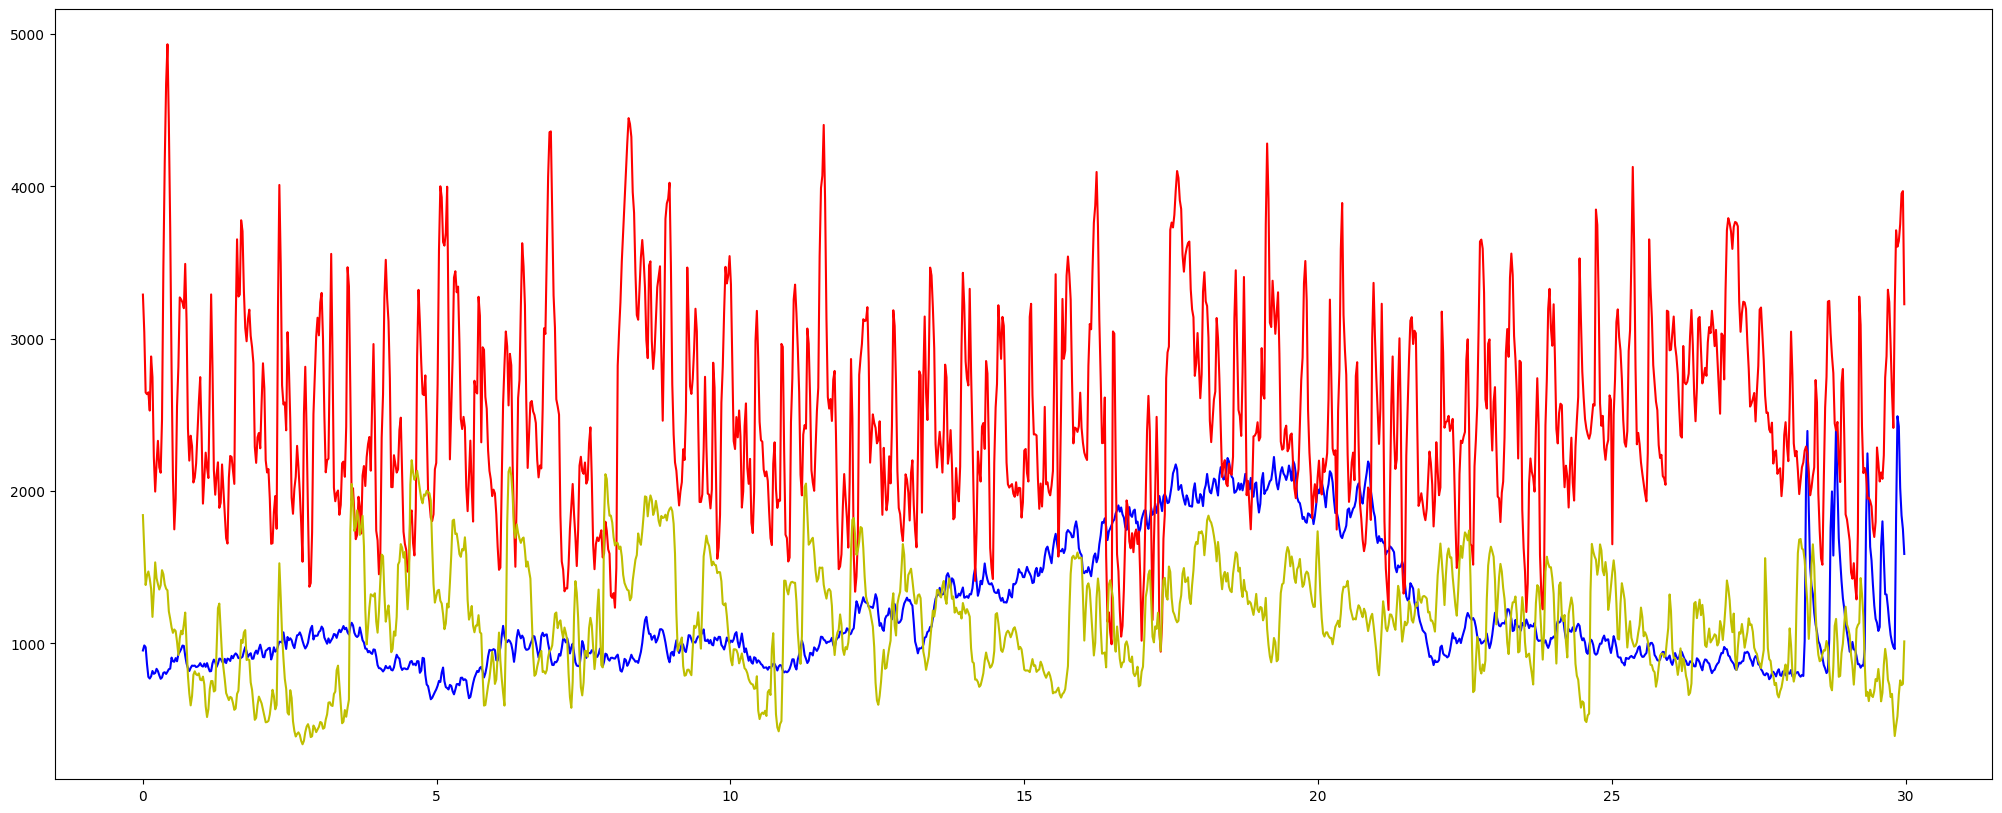

In [ ]:
plt.figure(figsize=(25,10))

plt.plot(t, sc_debussy, color='b')
plt.plot(t, sc_redhot, color='r')
plt.plot(t, sc_duke, color='y')

plt.show()

Spectral Bandwidth with librosa

In [ ]:
ban_debussy = librosa.feature.spectral_bandwidth(y=debussy, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_redhot = librosa.feature.spectral_bandwidth(y=redhot, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_duke = librosa.feature.spectral_bandwidth(y=duke, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [ ]:
ban_debussy.shape

(1292,)

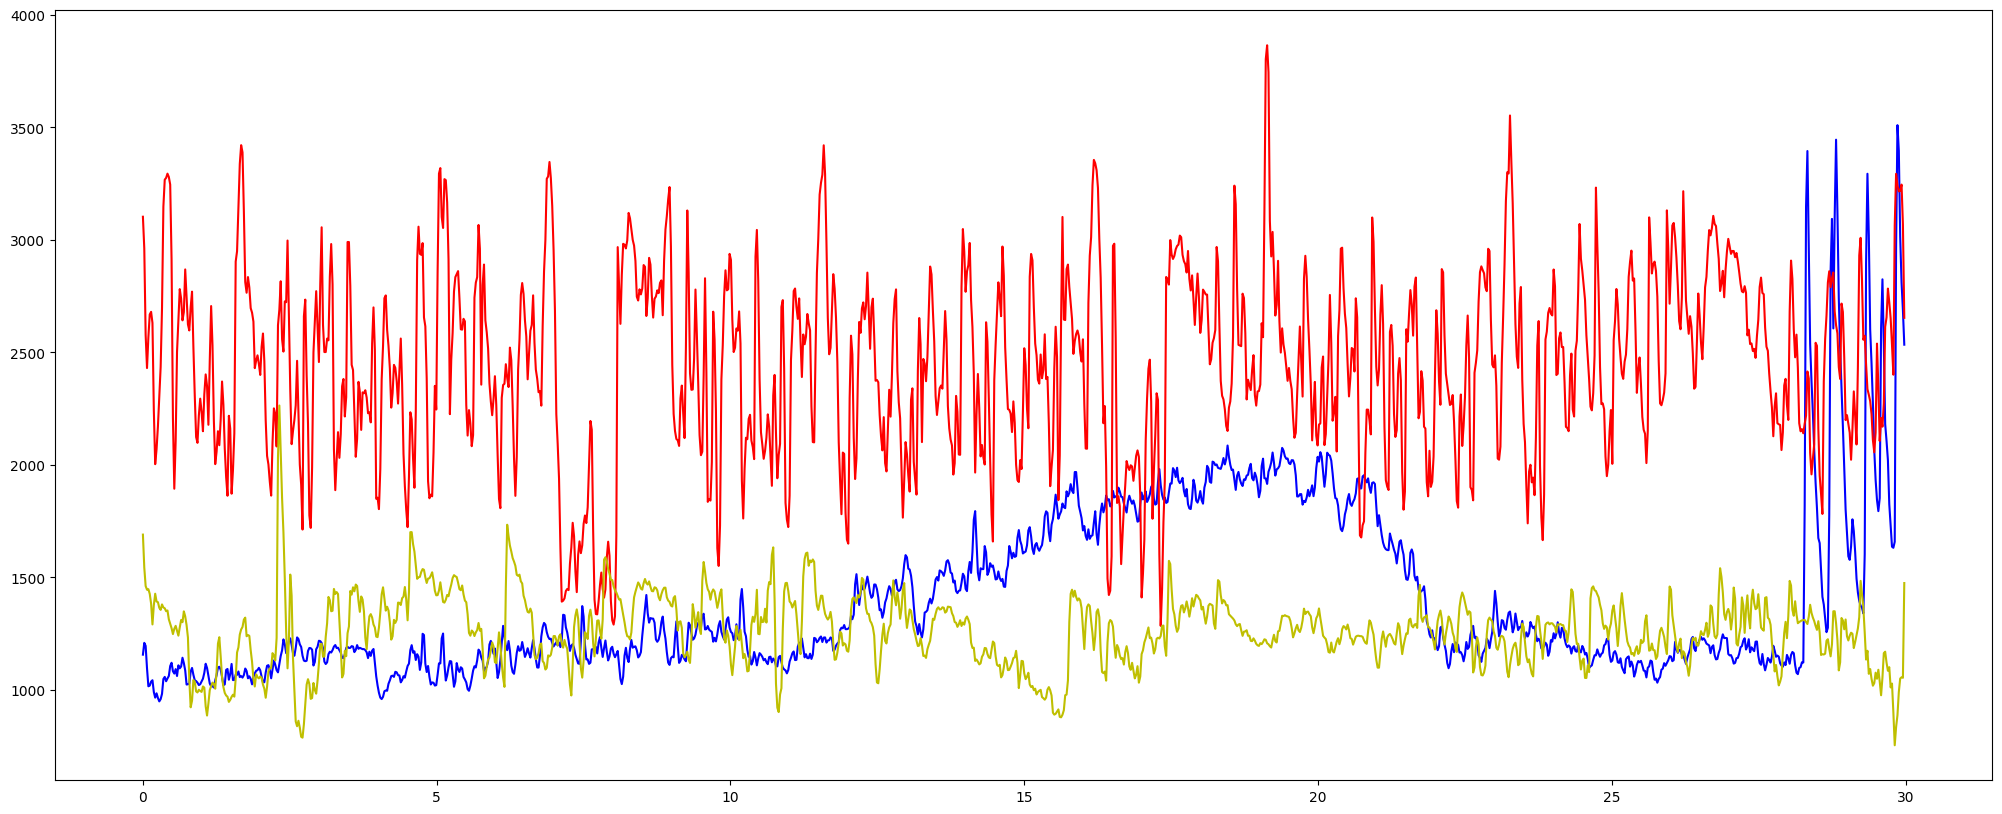

In [ ]:
plt.figure(figsize=(25,10))

plt.plot(t, ban_debussy, color='b')
plt.plot(t, ban_redhot, color='r')
plt.plot(t, ban_duke, color='y')

plt.show()

# ***Spectral RollOff ***- Spectral rolloff is the frequency below which a certain percentage (usually 85%) of the total spectral energy is contained. It helps distinguish between harmonic (vilan and flute) and percussive (drums,noisy) sounds.

$$
E=
i=0
∑
N
​
 ∣S(f
i
​
 )∣
2
$$

Where:
S(f
i
​
 ) = Magnitude of the STFT at frequency

N = Total number of frequency bins

RollOff Frequency means- The roll-off frequency is defined as the frequency under which some percentage (cutoff) of the total energy of the spectrum is contained. The roll-off frequency can be used to distinguish between harmonic (below roll-off) and noisy sounds (above roll-off).

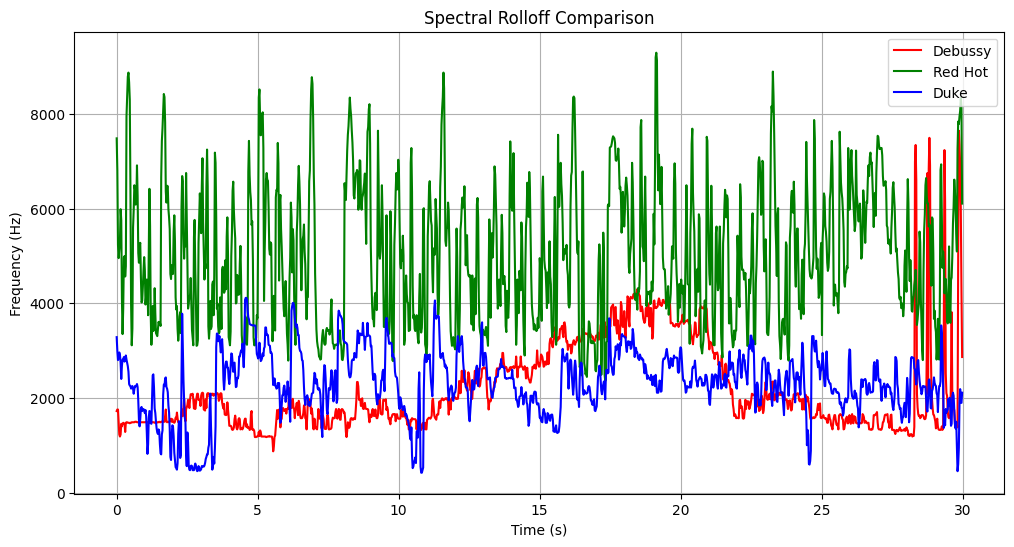

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio files
debussy_file = "path/to/debussy.wav"
redhot_file = "path/to/redhot.wav"
duke_file = "path/to/duke.wav"

debussy, sr_debussy = librosa.load('/content/drive/My Drive/Multimedia/debussy.wav')
redhot, sr_redhot = librosa.load('/content/drive/My Drive/Multimedia/redhot.wav')
duke, sr_duke = librosa.load('/content/drive/My Drive/Multimedia/duke.wav')

# Compute Spectral Rolloff
debussy_rolloff = librosa.feature.spectral_rolloff(y=debussy, sr=sr_debussy)
redhot_rolloff = librosa.feature.spectral_rolloff(y=redhot, sr=sr_redhot)
duke_rolloff = librosa.feature.spectral_rolloff(y=duke, sr=sr_duke)

# Plot all spectral rolloff curves in a single graph
plt.figure(figsize=(12, 6))

plt.plot(librosa.times_like(debussy_rolloff), debussy_rolloff[0], color="r", label="Debussy")
plt.plot(librosa.times_like(redhot_rolloff), redhot_rolloff[0], color="g", label="Red Hot")
plt.plot(librosa.times_like(duke_rolloff), duke_rolloff[0], color="b", label="Duke")

plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectral Rolloff Comparison")
plt.legend()
plt.grid(True)

plt.show()


# **Spectral Flatness:**
Spectral flatness measures how flat or peaky the spectrum is. A flat spectrum indicates white noise, while a peaky spectrum suggests tonal content.
Formula:
$$ S_F(t) = \frac{\sum_{f=0}^{F} |X(t, f)|^2}{\sum_{f=0}^{F} X(t, f) \cdot X^*(t, f)} $$
Where
X(t,f) is the spectral value of frequency bin f at time t.

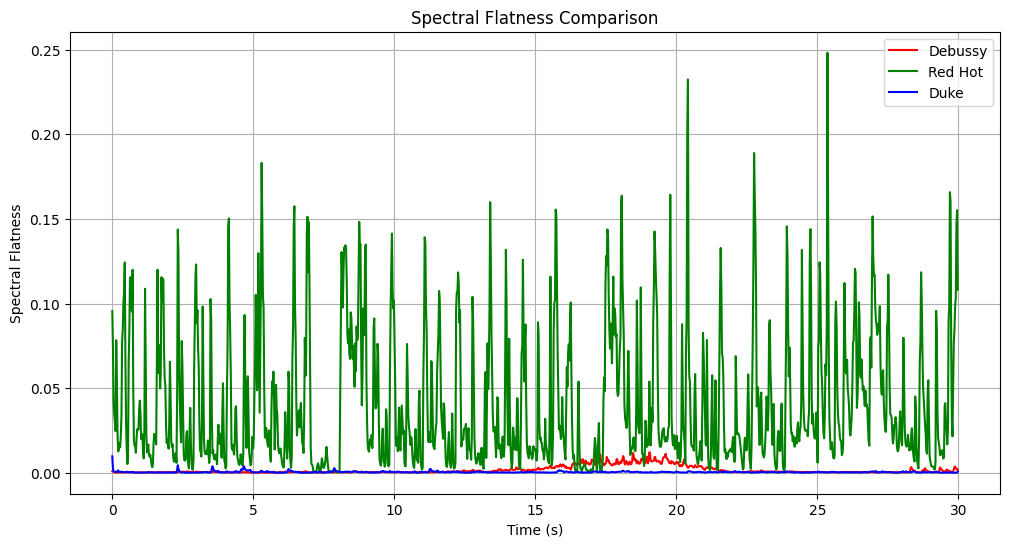

In [ ]:

# Load the audio files
debussy, sr_debussy = librosa.load('/content/drive/My Drive/Multimedia/debussy.wav')
redhot, sr_redhot = librosa.load('/content/drive/My Drive/Multimedia/redhot.wav')
duke, sr_duke = librosa.load('/content/drive/My Drive/Multimedia/duke.wav')

# Compute Spectral Flatness for each audio file
debussy_flatness = librosa.feature.spectral_flatness(y=debussy)
redhot_flatness = librosa.feature.spectral_flatness(y=redhot)
duke_flatness = librosa.feature.spectral_flatness(y=duke)

# Plot Spectral Flatness for all three audio files in a single graph
plt.figure(figsize=(12, 6))

plt.plot(librosa.times_like(debussy_flatness), debussy_flatness[0], color="r", label="Debussy")
plt.plot(librosa.times_like(redhot_flatness), redhot_flatness[0], color="g", label="Red Hot")
plt.plot(librosa.times_like(duke_flatness), duke_flatness[0], color="b", label="Duke")

plt.xlabel("Time (s)")
plt.ylabel("Spectral Flatness")
plt.title("Spectral Flatness Comparison")
plt.legend()
plt.grid(True)

plt.show()


**Mel-frequency cepstral coefficients (MFCCs)**


Mel-frequency cepstral coefficients represent the short-time power an audio clip based on the discrete cosine transform of the log power spectrum on a non-linear mel scale. The difference between a cepstrum and the mel-frequency cepstrum (MFC) is that in the MFC, the frequency bands are equally spaced on the mel scale to more closely resemble the human auditory system's response as opposed to the linearly-spaced bands in the normal spectrum. This frequency warping allows for better representation of sound and is especially useful in audio compression.

$$ \text{MFCC}_k = \sum_{m=1}^{M} \log S(t, m) \cos\left( \frac{k \pi (m - 1)}{M} \right) $$

Where
MFCC k are the MFCCs,
and

M is the number of Mel frequencies used.

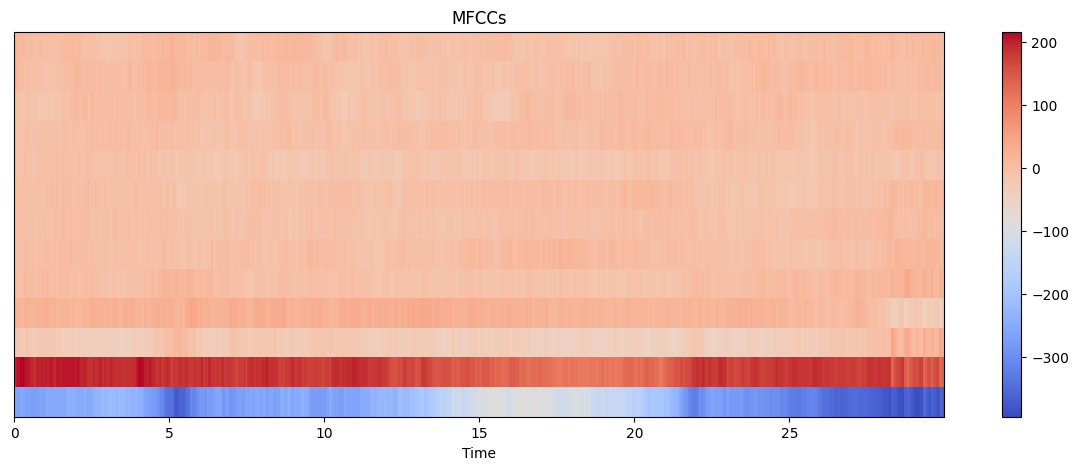

In [ ]:
#Load audio file (replace with the path to your file)
y, sr = librosa.load('/content/drive/My Drive/Multimedia/debussy.wav')

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCCs')
plt.show()


# **Spectral contrast**
Octave-based Spectral Contrast (OSC) was developed to represent the spectral characteristics of a musical piece. It considers the spectral peak and valley in each sub-band separately.

In general, spectral peaks correspond to harmonic components and spectral valleys correspond to non-harmonic components or noise in a music piece. Therefore, the difference between spectral peaks and spectral valleys will reflect the spectral contrast distribution.

The formula for Spectral Contrast can be expressed as:

$$ SC_k = \sum_{i \in P_k} S_i - \sum_{i \in V_k} S_i $$


Where:

SCk is the spectral contrast for the

k-th spectral band.

S i is the amplitude of the

i-th spectral component (frequency bin).
P
k
​
  is the set of spectral components (bins) in the peak region for the
𝑘
k-th band.
𝑉
𝑘 is the set of spectral components (bins) in the valley region for the
k-th band.

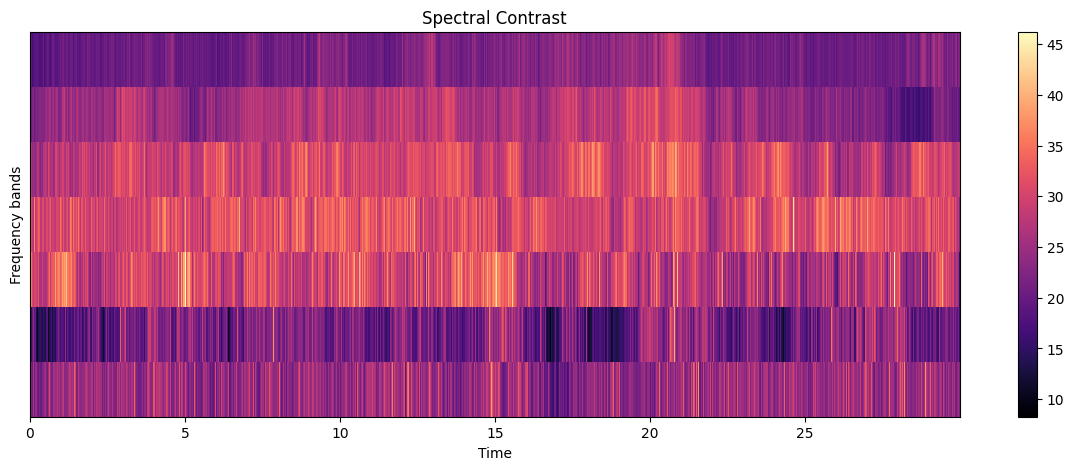

In [ ]:
# Assuming y_harmonic is the harmonic component of your audio signal
# (you might have computed it previously using librosa.effects.harmonic)
y_harmonic, _ = librosa.effects.hpss(y)

# Compute spectral contrast
contrast = librosa.feature.spectral_contrast(y=y_harmonic, sr=sr)

# Plot the spectral contrast
plt.figure(figsize=(15, 5))
librosa.display.specshow(contrast, x_axis='time', sr=sr)
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral Contrast')
plt.xlabel('Time')
plt.show()
